In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading data and reading first 5 rows
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.describe

<bound method NDFrame.describe of                  area_type   availability                  location  \
0      Super built-up Area         19-Dec  Electronic City Phase II   
1                Plot Area  Ready To Move          Chikka Tirupathi   
2            Built-up Area  Ready To Move               Uttarahalli   
3      Super built-up Area  Ready To Move        Lingadheeranahalli   
4      Super built-up Area  Ready To Move                  Kothanur   
...                    ...            ...                       ...   
13315        Built-up Area  Ready To Move                Whitefield   
13316  Super built-up Area  Ready To Move             Richards Town   
13317        Built-up Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up Area         18-Jun           Padmanabhanagar   
13319  Super built-up Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0

In [4]:
#listing missing data
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
#drop missing values
data = data.dropna()

In [6]:
#printing the unique values of non-numeric data
data.area_type.unique()

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

In [7]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', ' Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Kundalahalli', 'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Cholanayakanahalli', 'Kodanda Reddy Layout',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Kengeri', 'Yeshwanthpur', 'Chandapura', 'Kothanur',
       'Green View Layout', 'Shantiniketan Layout', 'Rajaji Nagar',
       'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout

In [8]:
#counting the number of rows and columns in data set
data.shape

(7496, 9)

In [9]:
#drop availability because it's not required 
data = data.drop('availability',axis=1)

In [10]:
#grouping by single column
locationcount = data.groupby('location').size().sort_values(ascending=False)
locationcount

location
Whitefield                        397
Sarjapur  Road                    310
Electronic City                   236
Kanakpura Road                    216
Thanisandra                       212
                                 ... 
Kalhalli                            1
 Bhoganhalli                        1
KSRTC Layout                        1
KR Garden                           1
Yeshwanthpur Industrial Suburb      1
Length: 634, dtype: int64

In [11]:
#calculating the number of items in location
len(locationcount[locationcount<=10])

491

In [12]:
#calculating the number of items in location which is less than 10
location_less_10 = locationcount[locationcount<=10]

In [13]:
#if the location have less than equal to 10 houses then that location is known as 'other location'
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [14]:
#calculating the unique values in location
len(data.location.unique())

144

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

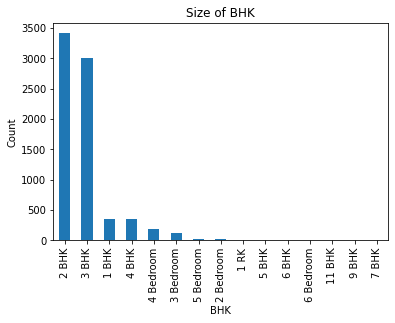

In [15]:
#displaying bar chart for bhk
data['size'].value_counts().plot(kind='bar')
plt.title('Size of BHK')
plt.xlabel('BHK')
plt.ylabel('Count')
sns.despine

In [16]:
## convert number of rooms to numeric values
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
data.bhk.unique() 

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [18]:
data.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [19]:
#converting 'total_sqft' to float values
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (  float(tokens[0]) + float(tokens[1])  )/2
    try:
        return float(x)
    except:
        return None

In [20]:
#displaying the table including total_sqft
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [21]:
#drop society column because it's not required
data = data.drop('society',axis=1)

In [22]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4


In [23]:
#creating new column 'price_sqft' that contain price per sqft
data['price_sqft'] = data.price*100000/data.total_sqft

In [24]:
#remove outlier using standard deviation
upper_limit = data.price_sqft.mean() + data.price_sqft.std()
lower_limit = data.price_sqft.mean() - data.price_sqft.std()
data = data[data.price_sqft<upper_limit] 
data = data[data.price_sqft > lower_limit]

In [25]:
#remove 2BHK house that price per sqft is less than the mean of 1bhk house price
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)

In [26]:
#drop price_sqft column because it's not required
data = data.drop('price_sqft',axis=1)

In [27]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [28]:
#apply one hot encoding in location column to convert the value to vector
dummies = pd.get_dummies(data.location)
location_cat = pd.get_dummies(data.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Concatenating 2 DataFrames horizontally with axis = columns
data = pd.concat([data,dummies.drop('1st Phase JP Nagar',axis='columns')],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,0,0,...,0,0,0,0,0,1,0,0,0,0
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#apply one hot encoding in area column to convert the value to vector
dummies = pd.get_dummies(data.area_type)
dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
3,0,0,0,1
11,0,0,1,0
12,0,0,0,1


In [31]:
data = pd.concat([data,dummies],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,0,0,...,0,0,0,0,0,0,0,0,0,1
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,0,0,...,0,1,0,0,0,0,0,0,1,0
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,0,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
#drop column because it is not required
data = data.drop(['location','size','area_type'] , axis=1)

In [33]:
data.head()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2600.0,5.0,3.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2785.0,5.0,3.0,295.00,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
12,1000.0,2.0,1.0,38.00,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#split data into dependent feature & independent feature
X = data.drop('price',axis=1)

In [35]:
#target the data
y=data['price']

In [36]:
#split data into train-test split and implementing it
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.90264951, 0.89014555, 0.86736688, 0.89276874, 0.87845573])

In [37]:
np.average(regressor)

0.8862772833440158

In [38]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [39]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [40]:
#predict the price 
y_pred = model.predict(x_test)

In [41]:
#displaying the metrics
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

18.04029996084996
847.1029504910176
29.10503307833574


In [42]:
#saving the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(model, fh)

In [43]:
cat = data.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)

In [44]:
#save the column name
location_list = list(zip(location_cat.columns,range(cat.shape[1])))

In [45]:
#pickle matplotlib plot
with open('location_cat', 'wb') as fid:
    pickle.dump(location_list, fid,2)  

In [46]:
#predicting the values
def predict(location,area,size,bath,balcony,total_sqft):
    output = np.zeros(151)
    output[0] = total_sqft
    output[1] = bath
    output[2] = balcony
    output[3] = size
    
    result_location = location
    if result_location not in location_cat:
        output[146] = 1
    else:
        output[index_dict[str(location)]] = 1
    
    return model.predict([output])[0]

In [47]:
#predicting with parameters(location , area_type , size , bath , balcony , total_sqft)
predict('Yelahanka','Carpet Area', 3, 3, 2 ,3000)

c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


260.2413760567031

In [48]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 2 ,3560)

c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


336.33339990198124

In [49]:
predict('Yelahanka New Town' , 'Carpet Area' , 3 , 4 , 2 ,4000)

c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


374.2027590887286

In [50]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 3 ,2550)

c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


226.97758150441817

In [51]:
predict('rajkot' , 'Carpet Area' , 3 , 3 , 3 ,2550)

c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


226.22407792296562